<a href="https://colab.research.google.com/github/amoyag/Biofisica/blob/main/session3_complexcircuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Run the cell below!!!

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

# Dynamics of Complex Biological circuits


## The feedback loop
Biological circuits, much like their electronic counterparts, rely on complex networks of interactions to regulate and control various functions within living organisms. Central to these networks are feedback loops, which play a pivotal role in maintaining homeostasis, orchestrating developmental processes, and enabling adaptive responses to environmental changes.

Feedback loops in biological systems are mechanisms through which a system regulates its own behavior by responding to its own outputs. These loops can be broadly classified into two categories:

1. **Positive Feedback Loops**: These amplify a signal or increase the output of a system.

2. **Negative Feedback Loops**: These work to dampen or stabilize a system. ### Feedback Loops and Memory in Biological Systems

Feedback loops in biological systems not only regulate immediate responses but also contribute to a form of cellular memory. This memory allows cells to remember and respond to past events, an essential feature for adaptation and survival in changing environments.

Biological memory, in this context, refers to the ability of a cell or a system to maintain a state or response over time, even after the initial stimulus that triggered the response has ceased. This capability is crucial for processes like development, immune responses, and learning in higher organisms.

### Role of Feedback Loops in Memory

1. **Stabilizing Information**: Negative feedback loops are particularly important in stabilizing states within cells. Once a cell commits to a particular state (like becoming a specific cell type during development), negative feedback mechanisms can help lock the system into that state, making it resistant to minor fluctuations in environmental conditions or internal noise.

2. **Maintaining States Over Time**: Positive feedback loops can maintain a response or a state over a prolonged period. Once triggered, a positive feedback loop can sustain its own activity, creating a lasting response until an external signal or a separate negative feedback loop intervenes. This is akin to a "latch" in electronics, where a switch, once flipped, stays in its new position.

3. **Bistability**: Some systems exhibit bistability, where they can stably exist in one of two states. This is often achieved through interlinked positive and negative feedback loops. In such systems, the transition from one state to another requires a significant stimulus, but once the change is made, the system remembers this state, even if the stimulus is removed. This property is called hysteresis and is a powerful mechanism for cellular memory.

We will simulate the dynamics of positive and negative feedback loops and explore their effect in memory.


## Positive  feedback loop
We set up a positive feedback loop in which transcription factor X activates transcription factors $Y_1$ and $Y_2$ which mutually activate each other. The input function at the $Y_1$ and $Y_2$ promoters is an OR gate. At time t=0 X begins to produce from an initial concentration of X=0. Initially, $Y_1$ = $Y_2$ = 0. All production rates are beta = 1 and removal rates are alpha = 1. All of the activation thresholds are K = 0.5. At time = 3 production of X stops.

To simulate this setting with ordinary differential equations, we need to define the ODEs for the concentrations of transcription factors X, $Y_1$, and $Y_2$ over time. The dynamics of the system are governed by the following principles:

1. **Production of X**: Begins at $t = 0 $and stops at $t = 3 $. The production rate is constant ($\beta = 1 $) when it is being produced.
2. **Production of $Y_1 $and $Y_2 $**: Activated by X and mutually activate each other. The input function at their promoters is an OR gate, meaning either X or the other Y factor can activate its production. The production rate ($\beta $) is 1.
3. **Removal of X, $Y_1 $, and $Y_2 $**: Each factor is removed at a constant rate ($\alpha = 1 $).
4. **Activation Thresholds**: All activation thresholds are $K = 0.5 $.

The ODEs can be expressed as follows:

- $\frac{dX}{dt} = \beta \cdot \text{production\_status}(t) - \alpha \cdot X $
- $\frac{dY_1}{dt} = \beta \cdot \text{activation}(X, Y_2) - \alpha \cdot Y_1 $
- $\frac{dY_2}{dt} = \beta \cdot \text{activation}(X, Y_1) - \alpha \cdot Y_2 $

Where $production\_status(t)$ is a function that returns 1 if $t < 3 $and 0 otherwise, and `activation(X, Y)` is a function that models the OR gate, returning 1 if either X or Y is above the threshold $K $.

Now, let's implement this in Python and plot the dynamics.
_Note that we set $\beta$ for $Y_2$ as $0.8 \cdot \beta$ so the plots for $Y_1$ and $Y_2$ don't overlap._

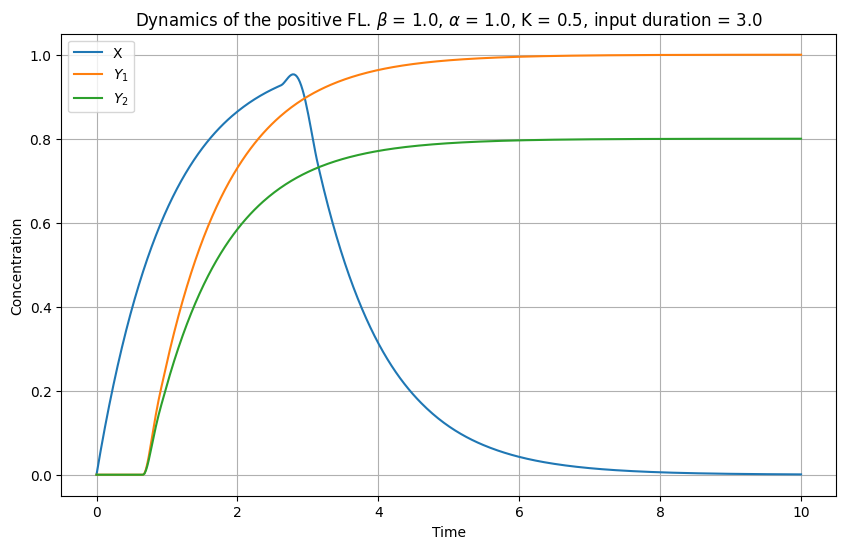

In [56]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
beta = 1 # production
alpha = 1 # removal rate
K = 0.5 # activation threshold
t_threshold = 3 #duration of X production

# ODE system
def odes(t, state):
    X, Y1, Y2 = state
    production_status = 1 if t < t_threshold else 0
    activation_Y1 = 1 if X > K or Y2 > K else 0
    activation_Y2 = 1 if X > K or Y1 > K else 0

    dXdt = beta * production_status - alpha * X
    dY1dt = beta * activation_Y1 - alpha * Y1
    dY2dt = (0.8*beta) * activation_Y2 - alpha * Y2

    return [dXdt, dY1dt, dY2dt]

# Initial conditions
initial_state = [0, 0, 0]  # X, Y1, Y2 initially zero

# Time points where the solution is computed
time = np.linspace(0, 10, 500)

# Solve ODE
solution = solve_ivp(odes, [0, 10], initial_state, t_eval=time)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[0], label='X')
plt.plot(solution.t, solution.y[1], label='$Y_1$')
plt.plot(solution.t, solution.y[2], label='$Y_2$')
plt.xlabel('Time')
plt.ylabel('Concentration')
title = f'Dynamics of the positive FL. $\\beta$ = {beta:.1f}, $\\alpha$ = {alpha:.1f}, K = {K:.1f}, input duration = {t_threshold:.1f}'
plt.title(title)
plt.legend()
plt.grid(True)
plt.show()


#### **Exercise 1: Positive Feedback Loop Memory**
Purpose: To understand how positive feedback loops create memory in biological systems.

Tasks:

- Run the first simulation with the default parameters (beta = 1, alpha = 1, K = 0.5)
- Change the duration of X production by modifying the time when X stops (currently t = 3). Try values of 1 and 4.
- Modify the activation threshold K to 0.05 and 1
- Change the removal rate (alpha) for Y1 and Y2 to 0.4 and 1.4

Questions to consider:

- How does the system behave after X is removed?
- What happens to Y1 and Y2 levels with different thresholds?
- How does the removal rate affect the memory of the system?

## Negative feedback loop
In the same setting, now $Y_1$ and $Y_2$ mutually repress each other. $X$ activates $Y_1$ and represses $Y_2$. The initial levels are $X = Y_1 = 0$; $Y_2 = 1$.

We'll modify the dynamics of X so that it is no longer governed by an ODE but is a predefined function of time. Specifically, X will be set to 1 for $t < 3$ and will abruptly go to 0 at $t = 3$. This change will simplify the system and make the effects of X's cessation on $Y_1$ and $Y_2$ more apparent.

The updated ODEs for $Y_1$ and $Y_2$ will be:

- $\frac{dY_1}{dt} = \frac{\beta \cdot \text{X}(t)}{K + \text{X}(t)} - \alpha \cdot Y_1 - \frac{\beta \cdot Y_1}{K + Y_2}$
- $\frac{dY_2}{dt} = - \frac{\beta \cdot \text{X}(t)}{K + \text{X}(t)} - \alpha \cdot Y_2 - \frac{\beta \cdot Y_2}{K + Y_1}$

Where $\text{X}(t)$ is a function that returns 1 for $t < 3$ and 0 otherwise.



_Note, for clarity we have simplified the dynamics of X to a step function and set $K$ = 1._



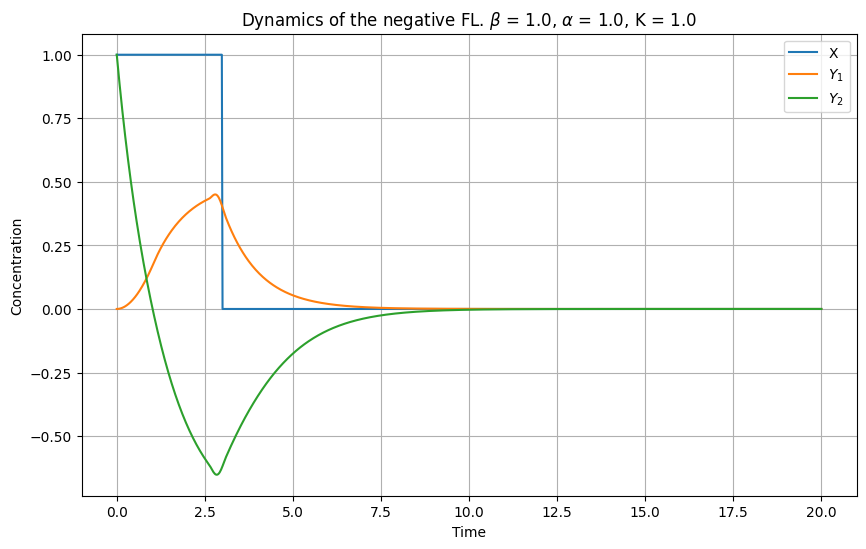

In [79]:
# Parameters
beta = 1
alpha = 1
K = 1

# Updated ODE system with X as a function of time
def X(t):
    """Function to represent the dynamics of X independent of ODEs."""
    return 1 if t < 3 else 0


## these dynamics create instabilities
#def updated_odes_v2(t, state):
#    Y1, Y2 = state
#
#    # X activates Y1 and represses Y2
#    activation_Y1 = beta * X(t) / (K + X(t))
#    repression_Y2 = beta * X(t) / (K + X(t))
#
#    # Mutual repression between Y1 and Y2
#    repression_Y1_by_Y2 = beta * Y2 / (K + Y2)
#    repression_Y2_by_Y1 = beta * Y1 / (K + Y1)

#    dY1dt = activation_Y1 - alpha * Y1 - repression_Y1_by_Y2
#    dY2dt = -repression_Y2 - alpha * Y2 - repression_Y2_by_Y1

#    return [dY1dt, dY2dt]
###################

## these dynamics are more robust
#Added non-negativity constraints
# Modified mutual repression terms to include cooperativity (Hill coefficient of 2)
# Added proper saturation kinetics for the repression

def updated_odes_v2(t, state):
    Y1, Y2 = state

    # X activates Y1 and represses Y2
    activation_Y1 = beta * X(t) / (K + X(t))
    repression_Y2 = beta * X(t) / (K + X(t))

    # Modified mutual repression to prevent negative values
    Y1_effect = beta * max(0, Y1) / (K + max(0, Y1))
    Y2_effect = beta * max(0, Y2) / (K + max(0, Y2))

    dY1dt = activation_Y1 - alpha * Y1 - Y2_effect
    dY2dt = -repression_Y2 - alpha * Y2 - Y1_effect

    return [dY1dt, dY2dt]





# New initial conditions: Y1 = 0, Y2 = 1
initial_state_v2 = [0, 1]

# Modified time range
time_range = np.linspace(0, 20, 1000)  # From 0 to 20 with 1000 points

# Solve ODE with new time range
solution_updated_v2 = solve_ivp(updated_odes_v2, [0, 20], initial_state_v2, t_eval=time_range)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(solution_updated_v2.t, [X(t) for t in solution_updated_v2.t], label='X')
plt.plot(solution_updated_v2.t, solution_updated_v2.y[0], label='$Y_1$')
plt.plot(solution_updated_v2.t, solution_updated_v2.y[1], label='$Y_2$')
plt.xlabel('Time')
plt.ylabel('Concentration')

# Create title with parameter values
# Using f-strings for clean formatting and LaTeX math notation for Greek letters
title = f'Dynamics of the negative FL. $\\beta$ = {beta:.1f}, $\\alpha$ = {alpha:.1f}, K = {K:.1f}'
plt.title(title)
plt.legend()
plt.grid(True)
plt.show()


# Plot results
#plt.figure(figsize=(10, 6))
#plt.plot(solution_updated_v2.t, [X(t) for t in solution_updated_v2.t], label='X')
#plt.plot(solution_updated_v2.t, solution_updated_v2.y[0], label='$Y_1$')
#plt.plot(solution_updated_v2.t, solution_updated_v2.y[1], label='$Y_2$')
#plt.xlabel('Time')
#plt.ylabel('Concentration')
#plt.title('Dynamics with Extended Time Range')
#plt.legend()
#plt.grid(True)
#plt.show()


# # Solve ODE with new conditions
# solution_updated_v2 = solve_ivp(updated_odes_v2, [0, 10], initial_state_v2, t_eval=time)
#
# # Plot results for the updated system
# plt.figure(figsize=(10, 6))
# plt.plot(solution_updated_v2.t, [X(t) for t in solution_updated_v2.t], label='X')
# plt.plot(solution_updated_v2.t, solution_updated_v2.y[0], label='$Y_1$')
# plt.plot(solution_updated_v2.t, solution_updated_v2.y[1], label='$Y_2$')
# plt.xlabel('Time')
# plt.ylabel('Concentration')
# plt.title('Dynamics with X as a Function of Time')
# plt.legend()
# plt.grid(True)
# plt.show()




## The Lambda Phage Switch: A Natural Bistable Circuit


One of the most fascinating aspects of biological systems is their ability to make clear, decisive choices between different states. The bacteriophage lambda, a virus that infects E. coli bacteria, provides a remarkable example of such decision-making at the molecular level. When lambda infects a bacterial cell, it must "choose" between two distinct lifestyles: the lytic pathway (where it immediately reproduces and kills the host cell) or the lysogenic pathway (where it integrates into the host genome and remains dormant).

This decision is controlled by an elegant molecular circuit centered around two key proteins: CI (also known as λ repressor) and Cro. These proteins engage in a mutual antagonism – each protein represses the production of the other. This creates a biological "toggle switch" where typically only one protein can dominate at a time: high CI levels maintain the lysogenic state, while high Cro levels trigger the lytic pathway.

What makes this system particularly interesting is its bistable nature. Like a light switch that can be either "on" or "off" but not in between, the lambda switch tends to settle into one of two stable states. This bistability arises from the mutual repression between CI and Cro, combined with cooperative binding (proteins binding as dimers) and carefully tuned protein production and degradation rates.

In our simulation, we'll explore how this bistable switch operates by modeling the key molecular interactions as a system of differential equations. The model incorporates several important biological features:

1. Cooperative binding of proteins (represented by Hill coefficients)
2. Mutual repression through operator binding
3. Basal protein production ("leaky" expression)
4. Protein degradation

By adjusting parameters like protein production rates (β), degradation rates (α), binding constants (K), and initial conditions, we can investigate:
- How small differences in initial protein levels can lead to dramatically different outcomes
- The conditions required for maintaining bistability
- The role of cooperative binding in creating switch-like behavior
- How protein degradation affects the stability of each state

This system serves as an excellent example of how relatively simple molecular interactions can create complex, switch-like behaviors essential for biological decision-making. Through our simulation, we'll gain insights into both the specific workings of the lambda switch and the general principles of biological bistability.

Would you like me to proceed with creating specific exercises that explore these concepts through parameter modifications?

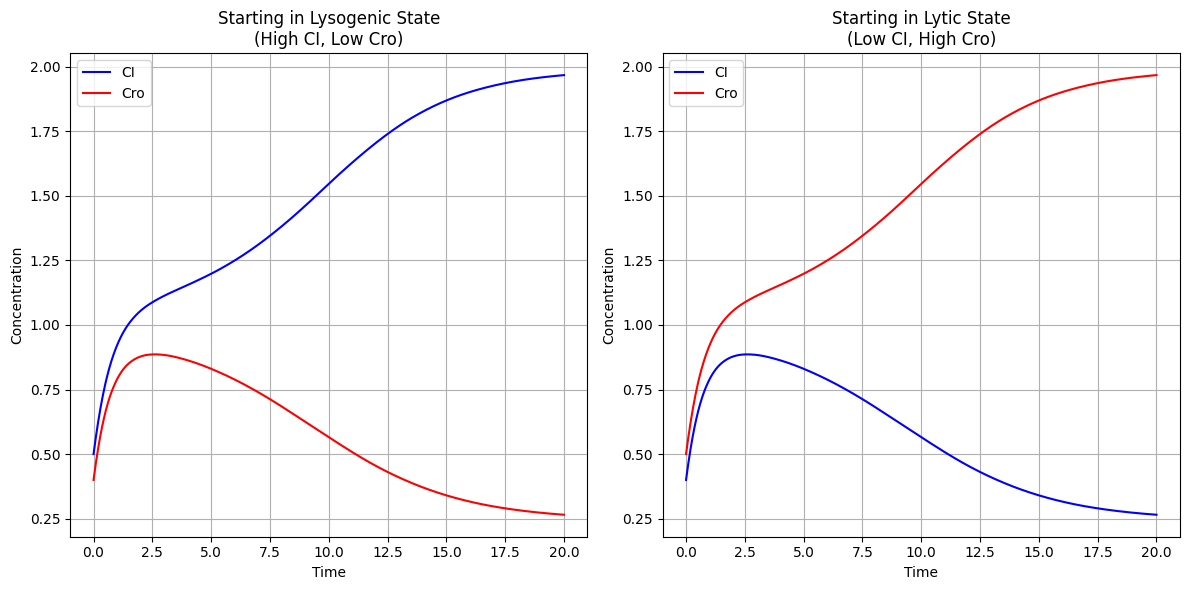

In [83]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def lambda_switch(t, state):
    """
    Simulate CI-Cro mutual repression in lambda phage

    The model represents:
    - CI repressing Cro production through OR operators
    - Cro repressing CI production through OR operators
    - Cooperative binding of proteins as dimers
    - Separate promoters for each protein
    """
    CI, Cro = state

    # Parameters
    n = 3           # Hill coefficient (dimerization)
    K_CI = 1.0      # CI binding constant
    K_Cro = 1.0     # Cro binding constant
    alpha = 0.5     # Protein degradation rate
    beta_CI = 1.0   # Maximum CI production rate
    beta_Cro = 1.0  # Maximum Cro production rate
    basal = 0.01    # Basal expression level

    # CI production: Repressed by Cro binding to operators
    # Higher Cro levels lead to stronger repression of CI
    CI_repression = 1/(1 + (Cro/K_Cro)**n)
    CI_production = basal + beta_CI * CI_repression

    # Cro production: Repressed by CI binding to operators
    # Higher CI levels lead to stronger repression of Cro
    Cro_repression = 1/(1 + (CI/K_CI)**n)
    Cro_production = basal + beta_Cro * Cro_repression

    # Rate equations showing mutual repression
    dCI_dt = CI_production - alpha * CI     # CI changes based on Cro repression
    dCro_dt = Cro_production - alpha * Cro  # Cro changes based on CI repression

    return [dCI_dt, dCro_dt]

# We can test different initial conditions to see bistability
# Starting with high CI, low Cro (favoring lysogenic state)
initial_conditions_1 = [0.5, 0.4]  # [CI_0, Cro_0]
# Starting with low CI, high Cro (favoring lytic state)
initial_conditions_2 = [0.4, 0.5]  # [CI_0, Cro_0]

# Time points
t = np.linspace(0, 20, 1000)

# Solve for both initial conditions
solution1 = solve_ivp(lambda_switch, [0, 20], initial_conditions_1, t_eval=t)
solution2 = solve_ivp(lambda_switch, [0, 20], initial_conditions_2, t_eval=t)

# Plot results
plt.figure(figsize=(12, 6))

# Plot first solution
plt.subplot(1, 2, 1)
plt.plot(solution1.t, solution1.y[0], label='CI', color='blue')
plt.plot(solution1.t, solution1.y[1], label='Cro', color='red')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Starting in Lysogenic State\n(High CI, Low Cro)')
plt.legend()
plt.grid(True)

# Plot second solution
plt.subplot(1, 2, 2)
plt.plot(solution2.t, solution2.y[0], label='CI', color='blue')
plt.plot(solution2.t, solution2.y[1], label='Cro', color='red')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Starting in Lytic State\n(Low CI, High Cro)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## SIM Biological Circuits

A Single Input circuit (SIM) is a simplified system where a single input (like a signaling molecule) controls a biological process. This input could be a hormone, a neurotransmitter, a nutrient, or any molecule that triggers a biological response. Imagine a hormone (let's call it Hormone H) that, upon entering a cell, triggers a series of biochemical reactions leading to the production of a specific protein.

ODEs allow us to model the rate of change of concentrations over time in a dynamic biological system. Each component of the SIM can be represented by an ODE that encapsulates its behavior and interactions. For instance, in our example, we might model the concentration of Hormone H, the activation state of a receptor, and the production rate of the protein.

Overview of the SIM:

1. **Components of the SIM**:
   - **Transcription Factor $X$**: Acts as the single input in this module, regulating the expression of genes $Z$ and $Z_2$.
   - **Genes $Z$ and $Z_2$**: Their expression is regulated by the transcription factor $X$, but each responds at a different threshold level of $X$.

### Key Features of the Simulation. LIFO:

1. **Dynamic Regulation**:
   - The transcription factor $X$ is produced up to a certain time point (t = 10) and then decays.
   - Genes $Z$ and $Z_2$ are activated at different threshold concentrations of $X$, reflecting different regulatory dynamics.

2. **Parameter Settings**:
   - `alpha_X, beta_X` etc., are parameters defining the rate of production and decay for $X, Z,$ and $Z_2$.
   - `X_threshold` and `X_threshold2` are the critical concentrations of $X$ that trigger the expression of $Z$ and $Z_2$, respectively.

### Simulating a FFL with LIFO behaviour
**LIFO (Last In, First Out) Temporal Program**, refers to the order in which gene expression is turned off as the level of $X$ decreases.


In [ ]:
# Parameters for X, Y, Z1, Z2, and Z3
alpha_X = 0.35
beta_X = 3
alpha_Y = 0.7
beta_Y = 2
alpha_Z1 = 0.3
beta_Z1 = 1
alpha_Z2 = 0.3
beta_Z2 = 1
alpha_Z3 = 0.3
beta_Z3 = 1
X_threshold = 1  # Threshold for X to activate Z genes
Y_threshold = 4
Z1_threshold = 2.3  # Threshold for Y to activate Z1
Z2_threshold = 1.8  # Threshold for Y to activate Z2
Z3_threshold = 1    # Threshold for Y to activate Z3


# Initial conditions
X_0 = 0.0
Y_0 = 0.0
Z1_0 = 0.0
Z2_0 = 0.0
Z3_0 = 0.0

# Time points
t = np.linspace(0, 20, 100)

# Redefining the system of differential equations with AND logic for Z1, Z2, and Z3

def ffl_system_and(conditions, t, alpha_X, beta_X, alpha_Y, beta_Y, alpha_Z1, beta_Z1, alpha_Z2, beta_Z2, alpha_Z3, beta_Z3, X_threshold, Y_threshold, Z1_threshold, Z2_threshold, Z3_threshold):
    X, Y, Z1, Z2, Z3 = conditions

    # Equation for X
    if t < 6:
        dXdt = beta_X - alpha_X * X
    else:
        dXdt = -alpha_X * X

    # Equation for Y
    if X > Y_threshold:
        dYdt = beta_Y - alpha_Y * Y
    else:
        dYdt = -alpha_Y * Y

    # Equations for Z1, Z2, Z3 using AND logic with different X thresholds
    dZ1dt = beta_Z1 - alpha_Z1 * Z1 if (Y > Z1_threshold and X > X_threshold) else -alpha_Z1 * Z1
    dZ2dt = beta_Z2 - alpha_Z2 * Z2 if (Y > Z2_threshold and X > X_threshold + 1) else -alpha_Z2 * Z2  # Slightly higher threshold for Z2
    dZ3dt = beta_Z3 - alpha_Z3 * Z3 if (Y > Z3_threshold and X > X_threshold + 2) else -alpha_Z3 * Z3  # Even higher threshold for Z3

    return [dXdt, dYdt, dZ1dt, dZ2dt, dZ3dt]

# Solve the system of ODEs with AND logic
conditions_and = odeint(ffl_system_and, [X_0, Y_0, Z1_0, Z2_0, Z3_0], t, args=(alpha_X, beta_X, alpha_Y, beta_Y, alpha_Z1, beta_Z1, alpha_Z2, beta_Z2, alpha_Z3, beta_Z3, X_threshold, Y_threshold, Z1_threshold, Z2_threshold, Z3_threshold))

# Extract X, Y, Z1, Z2, and Z3 for AND logic
X_and, Y_and, Z1_and, Z2_and, Z3_and = conditions_and.T

# Plot results for AND logic
plt.figure(figsize=(10, 6))
plt.plot(t, X_and, label='X')
plt.plot(t, Y_and, label='Y', color='red')
plt.plot(t, Z1_and, label='Z1', color='green')
plt.plot(t, Z2_and, label='Z2', color='blue')
plt.plot(t, Z3_and, label='Z3', color='purple')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Dynamics of X, Y, and Z1-Z3 over Time in a FFL with LIFO behaviour')
plt.grid(True)
plt.legend()
plt.show()



### Simulating a FFL with FIFO behaviour
**FIFO (First In, First Out) Temporal Program**, refers to the order in which gene expression is turned off as the level of $X$ decreases.

In [ ]:
# Re-importing necessary libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations
def ffl_system(conditions, t, alpha_X, beta_X, alpha_Y, beta_Y, alpha_Z1, beta_Z1, alpha_Z2, beta_Z2, alpha_Z3, beta_Z3, X_threshold, Y_threshold, Z1_threshold, Z2_threshold, Z3_threshold):
    X, Y, Z1, Z2, Z3 = conditions

    # Equation for X
    if t < 6:
        dXdt = beta_X - alpha_X * X
    else:
        dXdt = -alpha_X * X

    # Equation for Y
    if X > Y_threshold:
        dYdt = beta_Y - alpha_Y * Y
    else:
        dYdt = -alpha_Y * Y

    # Equations for Z1, Z2, Z3 using OR logic with different X thresholds
    dZ1dt = beta_Z1 - alpha_Z1 * Z1 if (Y > Z1_threshold or X > X_threshold) else -alpha_Z1 * Z1
    dZ2dt = beta_Z2 - alpha_Z2 * Z2 if (Y > Z2_threshold or X > X_threshold + 1) else -alpha_Z2 * Z2  # Slightly higher threshold for Z2
    dZ3dt = beta_Z3 - alpha_Z3 * Z3 if (Y > Z3_threshold or X > X_threshold + 2) else -alpha_Z3 * Z3  # Even higher threshold for Z3

    return [dXdt, dYdt, dZ1dt, dZ2dt, dZ3dt]

# Parameters for X, Y, Z1, Z2, and Z3
alpha_X = 0.35
beta_X = 3
alpha_Y = 0.3
beta_Y = 3
alpha_Z1 = 0.3
beta_Z1 = 1
alpha_Z2 = 0.3
beta_Z2 = 1
alpha_Z3 = 0.3
beta_Z3 = 1
X_threshold = 1  # Threshold for X to activate Z genes
Y_threshold = 4
Z1_threshold = 2.3  # Threshold for Y to activate Z1
Z2_threshold = 1.8  # Threshold for Y to activate Z2
Z3_threshold = 1    # Threshold for Y to activate Z3

# Initial conditions
X_0 = 0.0
Y_0 = 0.0
Z1_0 = 0.0
Z2_0 = 0.0
Z3_0 = 0.0

# Time points
t = np.linspace(0, 20, 100)

# Solve the system of ODEs
conditions = odeint(ffl_system, [X_0, Y_0, Z1_0, Z2_0, Z3_0], t, args=(alpha_X, beta_X, alpha_Y, beta_Y, alpha_Z1, beta_Z1, alpha_Z2, beta_Z2, alpha_Z3, beta_Z3, X_threshold, Y_threshold, Z1_threshold, Z2_threshold, Z3_threshold))

# Extract X, Y, Z1, Z2, and Z3
X, Y, Z1, Z2, Z3 = conditions.T

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, X, label='X')
plt.plot(t, Y, label='Y', color='red')
plt.plot(t, Z1, label='Z1', color='green')
plt.plot(t, Z2, label='Z2', color='blue')
plt.plot(t, Z3, label='Z3', color='purple')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Dynamics of X, Y, and Z1-Z3 over Time in a FFL with FIFO behaviour')
plt.grid(True)
plt.legend()
plt.show()

